# Part 0. Prepare the data

In [61]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [63]:
# 3D to 2D tensor flattening image rows into columns
def flatten_data(data):
    count = len(data)
    shape = data[1].shape
    return data.reshape(count, shape[0] * shape[1])

# Convert from 0-255 to 0-1
def standarize_value(data):
    return data.astype('float32')/255

In [64]:
# Flatten and standarize values
train_images = standarize_value(flatten_data(train_images))
test_images = standarize_value(flatten_data(test_images))

In [65]:
# One hot encoding labels
train_labels = ku.to_categorical(train_labels)
test_labels = ku.to_categorical(test_labels)

In [66]:
data = (train_images, train_labels, test_images, test_labels)

In [67]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.figure(0)
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()

def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.figure(1)
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
 
def compile_model(layer_config, shape, l2_regularizer, dropout):
    nn = models.Sequential()
    for i in range(len(layer_config)):
        units = layer_config[i]
        kwargs = {}
        if l2_regularizer is not None:
            kwargs["kernel_regularizer"] = regularizers.l2(l2_regularizer)
        
        if i == 0:
            layer = layers.Dense(units, activation = 'relu', input_shape = (shape[0], ), **kwargs)
        else:
            layer = layers.Dense(units, activation = 'relu',  **kwargs)
        nn.add(layer)
        
        if dropout is not None:
            nn.add(Dropout(rate = 1 - dropout))
        
    nn.add(layers.Dense(10, activation = 'softmax'))
    nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return nn

def analyze_sequential_model(data, layer_config, epochs=5, l2_regularizer=None, dropout=None):
    train_X, train_y, test_X, test_y = data
    shape = train_X[0].shape
    nn = compile_model(layer_config, shape, l2_regularizer, dropout)
    callbacks = [EarlyStopping(monitor='val_loss', patience=1),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
    fit_log = nn.fit(train_X, 
                     train_y,
                     callbacks = callbacks,
                     epochs = epochs, 
                     batch_size = 512, 
                     validation_data = (test_X, test_y))
    plot_loss(fit_log)
    plot_accuracy(fit_log)

# Part 1
A neural network using only l2 regularization with regularization parameters 0.01, 0.02, 0.03, 0.04, 0.05.

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 24us/step - loss: 5.6384 - accuracy: 0.7452 - val_loss: 1.6527 - val_accuracy: 0.8227
Epoch 2/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.2206 - accuracy: 0.8607 - val_loss: 1.2852 - val_accuracy: 0.7722
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.9017 - accuracy: 0.8860 - val_loss: 1.1622 - val_accuracy: 0.7783
Epoch 4/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.7821 - accuracy: 0.8997 - val_loss: 1.3060 - val_accuracy: 0.7330


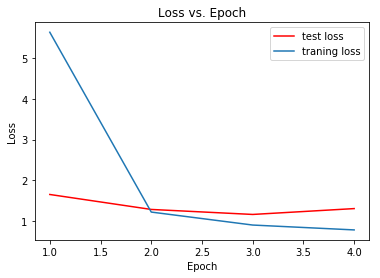

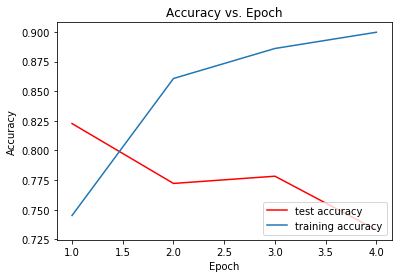

In [68]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 23us/step - loss: 8.5007 - accuracy: 0.6931 - val_loss: 1.7588 - val_accuracy: 0.7772
Epoch 2/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.4145 - accuracy: 0.8080 - val_loss: 1.0953 - val_accuracy: 0.8856
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.1665 - accuracy: 0.8328 - val_loss: 1.0488 - val_accuracy: 0.8703
Epoch 4/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.0503 - accuracy: 0.8533 - val_loss: 1.0047 - val_accuracy: 0.8632
Epoch 5/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.9816 - accuracy: 0.8638 - val_loss: 1.1086 - val_accuracy: 0.7959


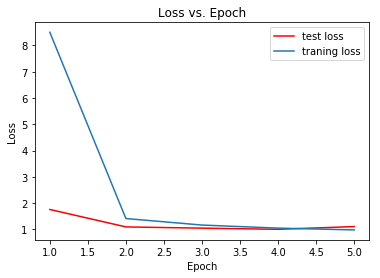

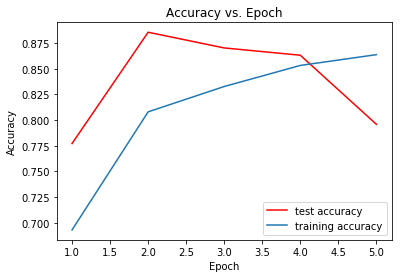

In [69]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.02)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 23us/step - loss: 13.8250 - accuracy: 0.5327 - val_loss: 2.2455 - val_accuracy: 0.4746
Epoch 2/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.7635 - accuracy: 0.6686 - val_loss: 1.5486 - val_accuracy: 0.7401
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.5452 - accuracy: 0.7293 - val_loss: 1.5073 - val_accuracy: 0.7411
Epoch 4/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.4292 - accuracy: 0.7545 - val_loss: 1.4614 - val_accuracy: 0.7197
Epoch 5/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.3373 - accuracy: 0.7788 - val_loss: 1.2758 - val_accuracy: 0.7942
Epoch 6/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.2782 - accuracy: 0.7893 - val_loss: 1.1970 - val_accuracy: 0.8173
Epoch 7/15
60000/60000 [==============================] - 1s 20us/s

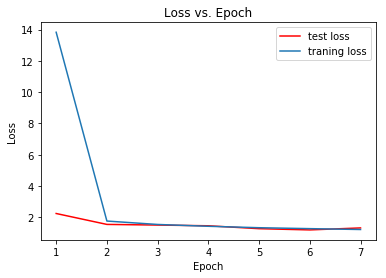

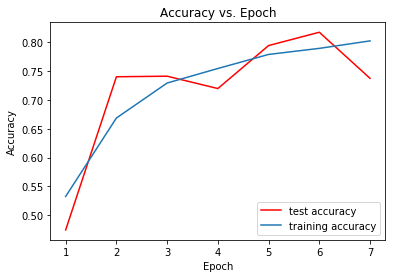

In [70]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.04)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 23us/step - loss: 16.5153 - accuracy: 0.4894 - val_loss: 2.4372 - val_accuracy: 0.3168
Epoch 2/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.8707 - accuracy: 0.5925 - val_loss: 1.9552 - val_accuracy: 0.4983
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.6806 - accuracy: 0.6328 - val_loss: 1.4664 - val_accuracy: 0.6925
Epoch 4/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.5597 - accuracy: 0.6683 - val_loss: 1.3970 - val_accuracy: 0.7461
Epoch 5/15
60000/60000 [==============================] - 1s 20us/step - loss: 1.4781 - accuracy: 0.6953 - val_loss: 1.5845 - val_accuracy: 0.6118


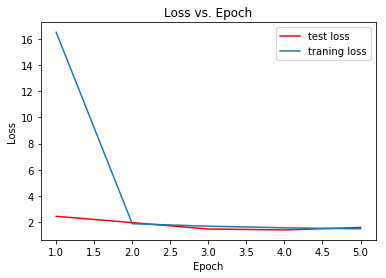

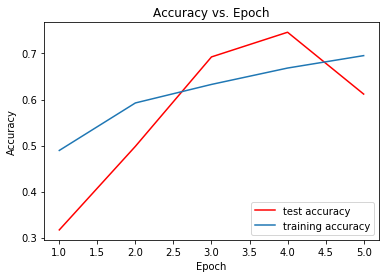

In [71]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.05)

### Results
Increasing the regularization parameter decreases significantly the performance of the model. It seems that this particular dataset is very sensible to increases on the bias of the model. The best regularization value was 0.02

# Part 2
A neural network using l2 regularization with parameter 0.01 and dropout regularization with p = 0.3, 0.4, 0.5, 0.6, 0.7.

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 6.6711 - accuracy: 0.4592 - val_loss: 1.5282 - val_accuracy: 0.8065
Epoch 2/15
60000/60000 [==============================] - 1s 23us/step - loss: 1.3548 - accuracy: 0.7922 - val_loss: 1.1433 - val_accuracy: 0.8082
Epoch 3/15
60000/60000 [==============================] - 1s 24us/step - loss: 1.1168 - accuracy: 0.8407 - val_loss: 0.8672 - val_accuracy: 0.9026
Epoch 4/15
60000/60000 [==============================] - 1s 23us/step - loss: 1.0385 - accuracy: 0.8540 - val_loss: 0.9051 - val_accuracy: 0.8814


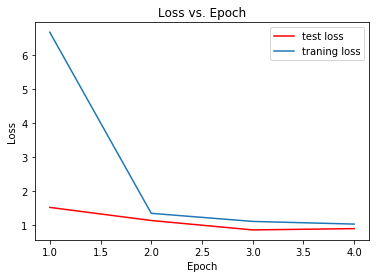

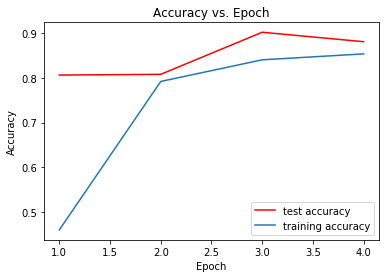

In [72]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 5.9410 - accuracy: 0.6194 - val_loss: 1.4120 - val_accuracy: 0.8729
Epoch 2/15
60000/60000 [==============================] - 1s 23us/step - loss: 1.2777 - accuracy: 0.8280 - val_loss: 0.9591 - val_accuracy: 0.8878
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.0473 - accuracy: 0.8546 - val_loss: 0.9459 - val_accuracy: 0.8649
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9741 - accuracy: 0.8650 - val_loss: 0.9256 - val_accuracy: 0.8674
Epoch 5/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9201 - accuracy: 0.8746 - val_loss: 0.8570 - val_accuracy: 0.8914
Epoch 6/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.8824 - accuracy: 0.8802 - val_loss: 0.8072 - val_accuracy: 0.8933
Epoch 7/15
60000/60000 [==============================] - 1s 22us/st

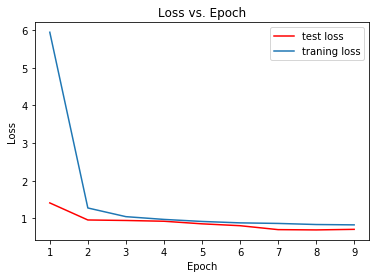

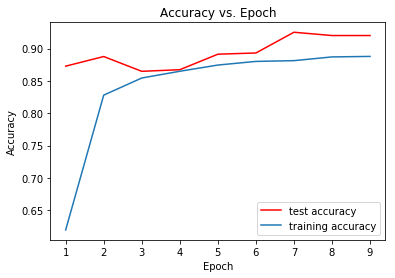

In [73]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 5.6552 - accuracy: 0.6823 - val_loss: 1.3786 - val_accuracy: 0.8939
Epoch 2/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.2434 - accuracy: 0.8424 - val_loss: 0.9501 - val_accuracy: 0.8784
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.0036 - accuracy: 0.8628 - val_loss: 0.8460 - val_accuracy: 0.9036
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9173 - accuracy: 0.8747 - val_loss: 0.8936 - val_accuracy: 0.8757


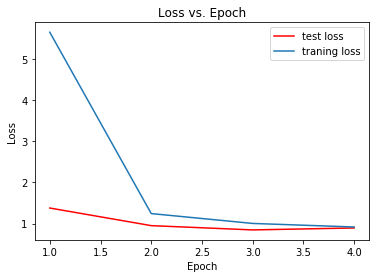

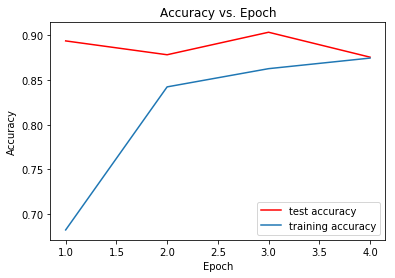

In [83]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 30us/step - loss: 5.5998 - accuracy: 0.7075 - val_loss: 1.4951 - val_accuracy: 0.8345
Epoch 2/15
60000/60000 [==============================] - 1s 24us/step - loss: 1.2330 - accuracy: 0.8475 - val_loss: 0.8991 - val_accuracy: 0.9124
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9719 - accuracy: 0.8708 - val_loss: 0.7648 - val_accuracy: 0.9263
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.8787 - accuracy: 0.8829 - val_loss: 0.7767 - val_accuracy: 0.9050


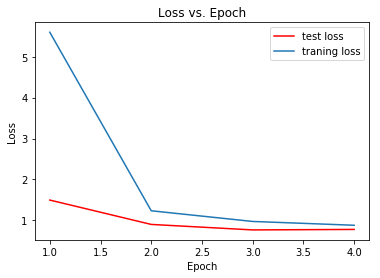

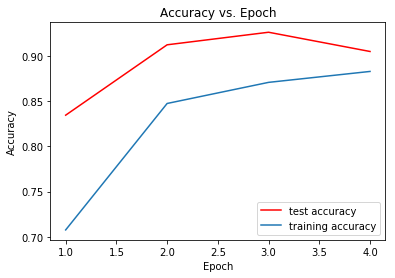

In [75]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.6)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 28us/step - loss: 5.6988 - accuracy: 0.7292 - val_loss: 1.5060 - val_accuracy: 0.8696
Epoch 2/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.2257 - accuracy: 0.8551 - val_loss: 0.8957 - val_accuracy: 0.9028
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9546 - accuracy: 0.8733 - val_loss: 0.7545 - val_accuracy: 0.9272
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.8484 - accuracy: 0.8882 - val_loss: 0.6823 - val_accuracy: 0.9387
Epoch 5/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.7875 - accuracy: 0.8965 - val_loss: 0.6359 - val_accuracy: 0.9376
Epoch 6/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.7482 - accuracy: 0.9027 - val_loss: 0.6738 - val_accuracy: 0.9179


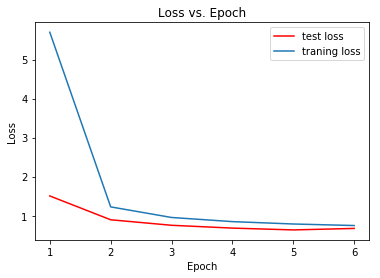

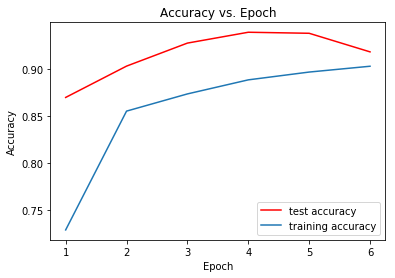

In [76]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.7)

### Results
Adding dropout regularization brings back the necessary variance into the model, increasing the  performance significantly for the model with 0.01 L2 regularization with 0.6 dropout. This model is the best one at this moment.

# Part 3
A neural network using dropout regularization with parameter 0.5 and l2 regularization with parameters 0.002, 0.004, 0.006, 0.008, 0.01.

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 28us/step - loss: 2.8141 - accuracy: 0.7668 - val_loss: 1.4456 - val_accuracy: 0.8881
Epoch 2/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.0142 - accuracy: 0.9112 - val_loss: 0.6767 - val_accuracy: 0.9437
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.6430 - accuracy: 0.9313 - val_loss: 0.5031 - val_accuracy: 0.9544
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.5339 - accuracy: 0.9363 - val_loss: 0.4293 - val_accuracy: 0.9568
Epoch 5/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.4779 - accuracy: 0.9417 - val_loss: 0.5364 - val_accuracy: 0.9209


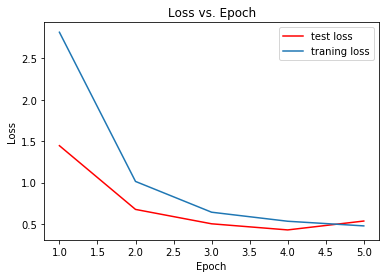

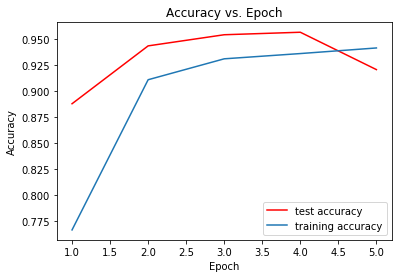

In [77]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.002, 0.5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 28us/step - loss: 3.8659 - accuracy: 0.7476 - val_loss: 1.5951 - val_accuracy: 0.8547
Epoch 2/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.0810 - accuracy: 0.8947 - val_loss: 0.6847 - val_accuracy: 0.9498
Epoch 3/15
60000/60000 [==============================] - 1s 21us/step - loss: 0.7445 - accuracy: 0.9136 - val_loss: 0.9878 - val_accuracy: 0.8179


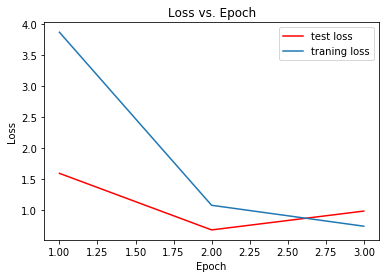

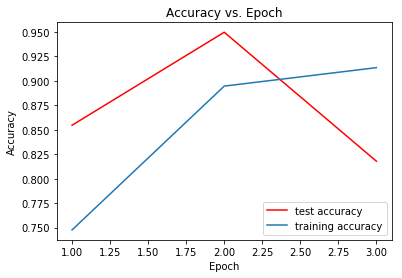

In [78]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.004, 0.5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/step - loss: 4.5524 - accuracy: 0.7216 - val_loss: 1.4569 - val_accuracy: 0.8717
Epoch 2/15
60000/60000 [==============================] - 1s 21us/step - loss: 1.1300 - accuracy: 0.8774 - val_loss: 0.9304 - val_accuracy: 0.8778
Epoch 3/15
60000/60000 [==============================] - 1s 21us/step - loss: 0.8433 - accuracy: 0.8939 - val_loss: 0.6811 - val_accuracy: 0.9275
Epoch 4/15
60000/60000 [==============================] - 1s 21us/step - loss: 0.7433 - accuracy: 0.9058 - val_loss: 0.7142 - val_accuracy: 0.9051


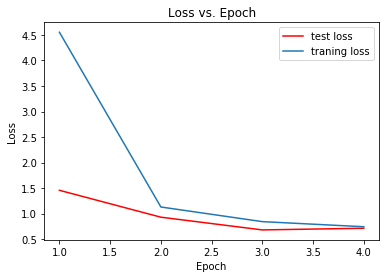

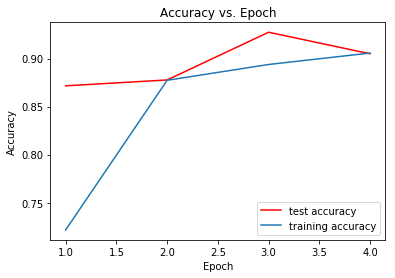

In [79]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.006, 0.5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/step - loss: 5.1188 - accuracy: 0.7111 - val_loss: 1.4703 - val_accuracy: 0.8492
Epoch 2/15
60000/60000 [==============================] - 1s 22us/step - loss: 1.1870 - accuracy: 0.8606 - val_loss: 1.1144 - val_accuracy: 0.8264
Epoch 3/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.9307 - accuracy: 0.8789 - val_loss: 0.7644 - val_accuracy: 0.9230
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.8394 - accuracy: 0.8903 - val_loss: 0.6713 - val_accuracy: 0.9340
Epoch 5/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.7861 - accuracy: 0.8970 - val_loss: 0.7370 - val_accuracy: 0.9005


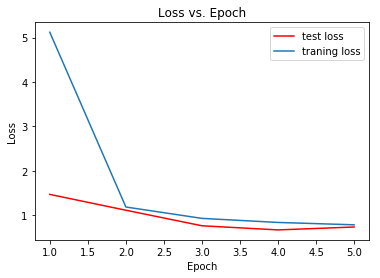

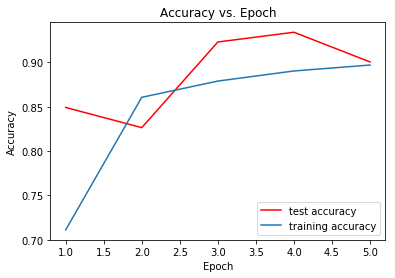

In [80]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.008, 0.5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 5.6452 - accuracy: 0.6833 - val_loss: 1.3134 - val_accuracy: 0.9035
Epoch 2/15
60000/60000 [==============================] - 1s 23us/step - loss: 1.2389 - accuracy: 0.8422 - val_loss: 0.9803 - val_accuracy: 0.8719
Epoch 3/15
60000/60000 [==============================] - 1s 23us/step - loss: 0.9941 - accuracy: 0.8678 - val_loss: 0.8538 - val_accuracy: 0.8923
Epoch 4/15
60000/60000 [==============================] - 1s 23us/step - loss: 0.9142 - accuracy: 0.8776 - val_loss: 0.8391 - val_accuracy: 0.8752
Epoch 5/15
60000/60000 [==============================] - 1s 23us/step - loss: 0.8625 - accuracy: 0.8833 - val_loss: 0.7390 - val_accuracy: 0.9192
Epoch 6/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.8185 - accuracy: 0.8908 - val_loss: 0.6726 - val_accuracy: 0.9301
Epoch 7/15
60000/60000 [==============================] - 1s 22us/st

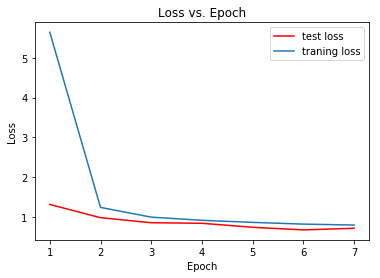

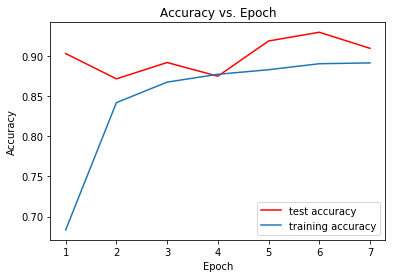

In [82]:
analyze_sequential_model(data, [512, 512, 512, 512], 15, 0.01, 0.5)

### Results
The model with the regularization at 0.008 is the best of the assignment, it make sense that selecting the best values of the two previous steps will lead to additional gains. It seems that additional final tunning of the parameters was necessary to find the final model but that is something we could automate in the future using cross validation. 